# Model Reproducibility

In this notebook I will reproduce one of the examples from the publication associated to the model and make sure the Ersilia Model Hub implementation is giving the same results.
The test is explained in the ReadMe File

### Importing the necessary modules and define the paths required

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from rdkit import Chem
data_file = r"D:\data\testset.txt"
output_file = "D:\data\output_data.json"
data_file2 = r"D:\data\Table S6.xlsx"
output_file2 = r"D:\data\outputT2.csv" 

## Testing dataset

I first tried to reproduce the results of the testing dataset which was used by the authors.

In [2]:
test_df = pd.read_csv(data_file)

In [3]:
test_df.head()

,SMILES,No.,Smiles,activity10,activity20,activity40,activity60,activity80,activity100
0,O=C(c1ccncc1)N1CCC2(CCN(Cc3ccccc3OCC(F)(F)C(F)...,A1008,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...,1.0,1.0,1.0,1.0,1.0,1.0
1,CNCc1ccc(C(F)(F)F)cc1Oc1ccc(Cl)cc1,A1009,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F,1.0,1.0,1.0,1.0,1.0,1.0
2,N#Cc1ccc2nc(C3CCC4(CC3)CN(c3ccccc3)C(=O)O4)[nH...,A101,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...,1.0,1.0,1.0,1.0,1.0,1.0
3,Cc1ccc2c(c1)CC(CCN(C)C)=C2C(C)c1cnccn1,A1010,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3,1.0,1.0,1.0,1.0,1.0,1.0
4,Cc1nc(C)c(-c2ccc3cc(CCN4CCCC4C)ccc3n2)s1,A1011,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...,1.0,1.0,1.0,1.0,1.0,1.0


Checking if all the smiles are valid or not

In [ ]:
def is_valid_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

In [ ]:
valid_smiles = test_df['Smiles'].apply(is_valid_smiles)
print("Are all SMILES strings valid?", all(valid_smiles))

Removing all thc columns other than Smiles and activity10 because the model only predicts activity10 values so we only have to check if the class in activity10 matches

In [4]:
test_df = test_df[['Smiles','activity10']]

In [5]:
test_df.isnull().sum()

Smiles          0
activity10    514
dtype: int64

### Removing the null values

In [6]:
test_df.dropna(inplace = True)

In [7]:
test_df.shape

(781, 2)

Creating a seperate dataframe and csv file where only smiles are stored. This .csv file will be used to get predictions from ersilia

## ersilia predictions

In [8]:
ersilia_data = test_df['Smiles']

In [9]:
ersilia_data.to_csv("D:\data\input_data.csv")

This file was used as input for ersilia, the results were obtained by running the following commands on command line: 
<br> ```ersilia -v fetch eos30gr```
<br> ```ersilia serve eos30gr```
<br>```ersilia -v api run -i input_data.csv -o output_data.json```

In [10]:
pred = pd.read_json(output_file)

In [11]:
pred.head()

,input,output
0,"{'key': 'ZADAAHRYTRXWRE-UHFFFAOYSA-N', 'input'...",{'outcome': 0.9678217768669121}
1,"{'key': 'OJLXPNXGJXIUAY-UHFFFAOYSA-N', 'input'...",{'outcome': 0.935643553733825}
2,"{'key': 'VJDPCRVAZYFIDE-UHFFFAOYSA-N', 'input'...",{'outcome': 0.935643553733825}
3,"{'key': 'OWMBYQVIMDTSAW-HNNXBMFYSA-N', 'input'...",{'outcome': 0.9653465151786801}
4,"{'key': 'BQISWHWVPNTPCD-CQSZACIVSA-N', 'input'...",{'outcome': 0.9278877973556511}


In [12]:
pred1 = pd.json_normalize(pred['input'])
pred2 = pd.json_normalize(pred['output'])

Merging the predictions with the input dataframe

In [14]:
pred = pd.merge(pred1,pred2,left_index=True, right_index=True, how='inner')

In [15]:
pred.head()

,key,input,text,outcome
0,ZADAAHRYTRXWRE-UHFFFAOYSA-N,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...,0.967822
1,OJLXPNXGJXIUAY-UHFFFAOYSA-N,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F,0.935644
2,VJDPCRVAZYFIDE-UHFFFAOYSA-N,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...,0.935644
3,OWMBYQVIMDTSAW-HNNXBMFYSA-N,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3,0.965347
4,BQISWHWVPNTPCD-CQSZACIVSA-N,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...,0.927888


In [16]:
pred.isnull().sum()

key        0
input      0
text       0
outcome    0
dtype: int64

In [17]:
data = test_df.merge(pred,left_on = 'Smiles',right_on = 'input')

In [18]:
data.head()

,Smiles,activity10,key,input,text,outcome
0,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...,1.0,ZADAAHRYTRXWRE-UHFFFAOYSA-N,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...,0.967822
1,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F,1.0,OJLXPNXGJXIUAY-UHFFFAOYSA-N,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F,0.935644
2,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...,1.0,VJDPCRVAZYFIDE-UHFFFAOYSA-N,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...,0.935644
3,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3,1.0,OWMBYQVIMDTSAW-HNNXBMFYSA-N,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3,0.965347
4,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...,1.0,BQISWHWVPNTPCD-CQSZACIVSA-N,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...,0.927888


In [19]:
data.isnull().sum()

Smiles        0
activity10    0
key           0
input         0
text          0
outcome       0
dtype: int64

In [20]:
data.rename(columns = {'activity10':'Class','outcome':'Predicted Probability'},inplace = True)

In [21]:
data = data[['Smiles','Class','Predicted Probability']]

In [22]:
data.head()

,Smiles,Class,Predicted Probability
0,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...,1.0,0.967822
1,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F,1.0,0.935644
2,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...,1.0,0.935644
3,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3,1.0,0.965347
4,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...,1.0,0.927888


Calculating the roc-auc value

In [23]:
fpr, tpr, thresholds = roc_curve(data['Class'], data['Predicted Probability'])

In [24]:
auc_score = auc(fpr, tpr)

In [25]:
print("AUC Score:", auc_score)

AUC Score: 1.0


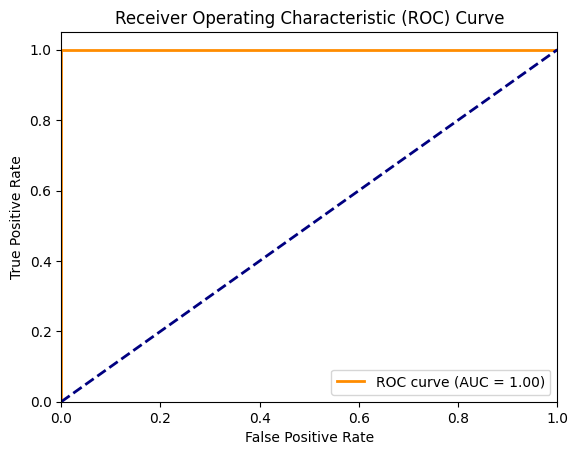

In [26]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The AUC score is 1! So the model is working perfectly on the testing dataset.

# FDA approved drugs list

SInce the model was working so perfectly on the training data, I decided to check the results on another dataset that was used by the authors. It contains 1,824 FDA-approved drugs whose probability was predicted by the authors in the paper after the model had been trained.

In [50]:
df = pd.read_excel(data_file2,header = 1)

In [51]:
df.head()

,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.996768,0.003232,0


Here the predicted positive probability is the probability that was obtained by the authors when they used the models.So we wish to reproduce these results.

In [52]:
ersilia_data2 = df[['Name','Smiles']]

In [53]:
ersilia_data2.to_csv("D:\data\InputT2.csv")

In [54]:
output_df = pd.read_csv(output_file2)

In [55]:
df = df.merge(output_df,left_on = 'Smiles',right_on = 'input')

In [56]:
df.shape

(1832, 9)

In [57]:
df.head()

,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification,key,input,activity10
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1,LQBVNQSMGBZMKD-UHFFFAOYSA-N,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,0.440594
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0,OBMNJSNZOWALQB-NCQNOWPTSA-N,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,0.333498
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1,BVAZQCUMNICBAQ-PZHYSIFUSA-N,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,0.351485
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0,FGQFOYHRJSUHMR-UHFFFAOYSA-N,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,0.329208
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.996768,0.003232,0,RDMOROXKXONCAL-UEKVPHQBSA-N,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,0.121040


In [58]:
df = df[['Smiles','Predicted positive probability','Predicted classification','activity10']]

In [59]:
df.rename(columns = {'Predicted positive probability':'Model Probabilities','activity10':'Ersilia Probabilities','Predicted classification':'Class'},inplace = True)

In [60]:
df.head()

,Smiles,Model Probabilities,Class,Ersilia Probabilities
0,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,0.834604,1,0.440594
1,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,0.314661,0,0.333498
2,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,0.851315,1,0.351485
3,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,0.124276,0,0.329208
4,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,0.003232,0,0.121040


In [40]:
df.columns

Index(['Smiles', 'Model Probabilities', 'Ersilia Probabilities'], dtype='object')

Plotting the scatter plot of author's probabilities vs ersilias

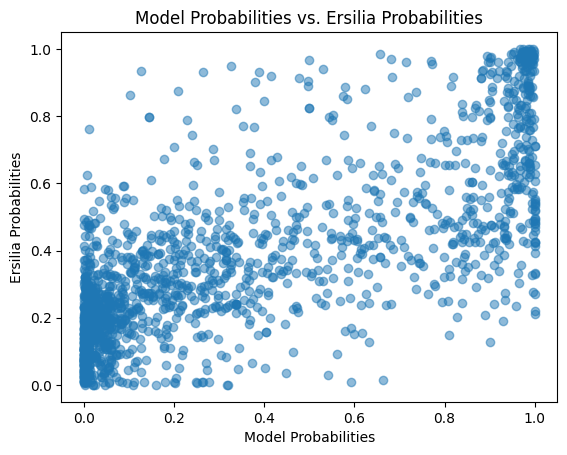

In [42]:
plt.scatter(df['Model Probabilities'],df['Ersilia Probabilities'],alpha=0.5)
plt.title('Model Probabilities vs. Ersilia Probabilities')
plt.xlabel('Model Probabilities')
plt.ylabel('Ersilia Probabilities');

In this we can clearlt see that there is a lot more disparity in the results

In [43]:
diff = df['Ersilia Probabilities'] - df['Model Probabilities'] 

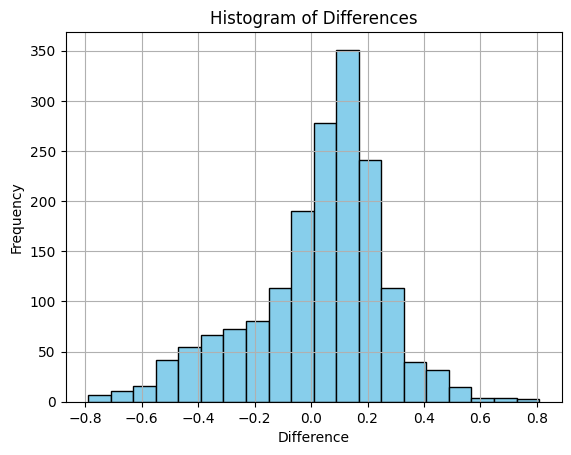

In [44]:
plt.hist(diff, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')
plt.grid(True)
plt.show()

Plotting the histogram we can see that there is quite a lot of difference in the values.

In [64]:
df.isnull().sum()

Smiles                    0
Model Probabilities       1
Class                     0
Ersilia Probabilities    97
dtype: int64

In [65]:
df.dropna(inplace = True)

Taking the classes predicted by authors as true classes, 

In [66]:
fpr, tpr, thresholds = roc_curve(df['Class'], df['Ersilia Probabilities'])

In [67]:
auc_score = auc(fpr, tpr)

In [68]:
print("AUC Score:", auc_score)

AUC Score: 0.9034325068870523


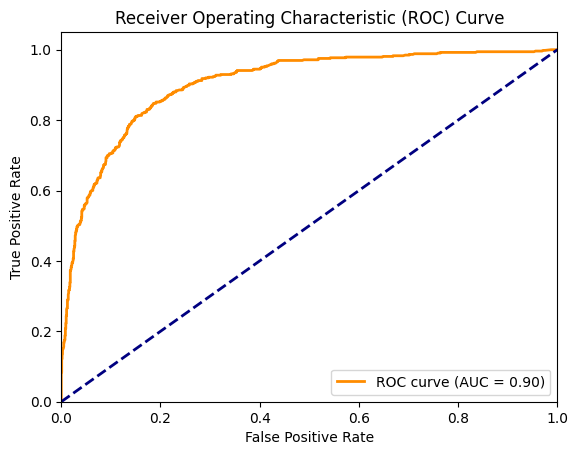

In [69]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()